<a href="https://colab.research.google.com/github/tyleretheridge/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/Copy_of_LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
# TODO - code!

## 1) Write a function

In [0]:
# Create Bayes Theorem Function
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):
  # Prior Complement Probability
  prob_not_drunk = 1 - prob_drunk_prior
  numerator = (true_positive_rate * prob_drunk_prior)
  denominator = (true_positive_rate * prob_drunk_prior)+(false_positive_rate * prob_not_drunk)
  posterior_probability = numerator / denominator
  return posterior_probability

What is the probability that a person is drunk after one positive breathalyzer test?

In [0]:
result = prob_drunk_given_positive((1/1000),(8/100),1)
result

0.012357884330202669

P(Drunk | +) = 1.2%

What is the probability that a person is drunk after two positive breathalyzer tests?

In [0]:
prob_drunk_given_positive(result,(8/100),1)

0.13525210993291495

P(Drunk | 2+) = 13.5%

How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

In [0]:
result = prob_drunk_given_positive((1/1000),(8/100),1)
i = 1
while (result < 0.95):                                                           
  result = prob_drunk_given_positive(result,(8/100),1)
  i += 1
  print("The result is", result, "after", i, "positive tests.")
                                 

The result is 0.13525210993291495 after 2 positive tests.
The result is 0.6615996951348605 after 3 positive tests.
The result is 0.9606895076105054 after 4 positive tests.


4 positive tests are needed to arrive at a probability that is greater than 95%

## 2) Explore `scipy.stats.bayes_mvs`

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [0]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data


--2020-03-18 19:48:32--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2020-03-18 19:48:37 (640 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [0]:
# Traditional approach

# Create a function to calculate confidence interval
def confidence_interval(data, confidence=0.95):
  # Convert input to numpy array for vectorized operations
  data = data.dropna()
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  # Calculate standard error
  std_error = stats.sem(data)
  interval = std_error * stats.t.ppf((1+ confidence) / 2.0, n - 1)
  return(mean, mean - interval, mean + interval)


In [0]:
df = pd.read_csv('house-votes-84.data', names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])
print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
# Encode values and replace abstained votes
df = df.replace({'y': 1, 'n': 0, '?': np.NaN})
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
confidence_interval(df['water-project'])

(0.5038759689922481, 0.45384081311663604, 0.5539111248678601)

In [0]:
# Create a function to graph results of confidence_interval function
def confidence_graph(data):
  CI = confidence_interval(data)

  data.plot.density()
  plt.axvline(x=CI[1], color='red')
  plt.axvline(x=CI[0], color='black')
  plt.axvline(x=CI[2], color='red');
  plt.show()
  return


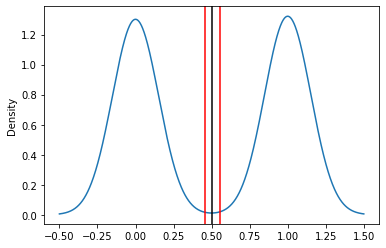

In [0]:
# Graph water project data
confidence_graph(df['water-project'])

In [0]:
# Calculate confidence interval using scipy
data_cleaned = df['water-project'].dropna()
mean_CI, _,_ = stats.bayes_mvs(data_cleaned, alpha=0.95) 
mean_CI

Mean(statistic=0.5038759689922481, minmax=(0.45384081311663604, 0.5539111248678601))

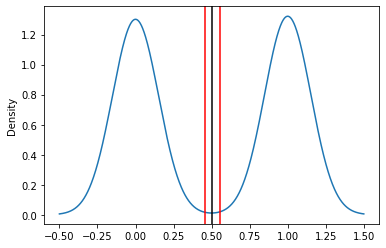

In [0]:
# Plot results from bayes calculations
data_cleaned.plot.density()
plt.axvline(x=mean_CI.statistic, color='black')
plt.axvline(x=mean_CI.minmax[0], color='red')
plt.axvline(x=mean_CI.minmax[1], color='red');
plt.show()



## 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

Unlike Frequentist statistics, Bayesian statistics can use outside knowledge of events or conditionals to be used as parameters and tools in seeking the calculation of a probability. This difference allows for a difference in sampling approach since Frequentist approaches would require much more data to be able to develop similar confidence intervals or p-values. 

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!